# Preparation

In [1]:
# # These are my default settings
# import warnings
# warnings.filterwarnings("ignore")

# import os
# from tqdm import tqdm
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# import joblib

# plt.rcParams["figure.figsize"] = (12, 6)
# sns.set()
# pd.set_option("display.max_columns", None)

# import zipfile
# import shutil

# # optimized sklearn patch from intel distribution
# from sklearnex import unpatch_sklearn
# unpatch_sklearn()

# Loading train and valid data

In [2]:
import numpy as np
file_path = "./save_file/"

X_train = np.load(file_path + 'X_train.npy')
y_train = np.load(file_path + 'y_train.npy')
X_valid = np.load(file_path + 'X_valid.npy')
y_valid = np.load(file_path + 'y_valid.npy')

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)


(48000, 784) (48000,) (12000, 784) (12000,)


# Modeling

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [4]:
latent_dim = 64 

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = Sequential([
        # layers.Flatten(),
        layers.Dense(392, activation='relu'),
        layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = Sequential([
        layers.Dense(392, activation='relu'),
        layers.Dense(784, activation='sigmoid'),
        # layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)


In [5]:
# model_dir = "./model"
# log_dir = "./logs"

# if not os.path.exists(model_dir):
#     os.mkdir(model_dir)
# if not os.path.exists(log_dir):
#     os.mkdir(log_dir)

# my_callbacks = [
#     ModelCheckpoint(filepath=model_dir, monitor='val_loss', save_best_only=False),
#     EarlyStopping(monitor='val_loss', min_delta=0, patience=10),
#     TensorBoard(log_dir=log_dir)
#     ]

In [6]:
# Model compile

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [7]:
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=48000, shuffle=True, 
                validation_data=(X_valid, X_valid))

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.2313 - val_loss: 0.2261
Epoch 2/50
1/1 [==============================] - 0s 225ms/step - loss: 0.2261 - val_loss: 0.2180
Epoch 3/50
1/1 [==============================] - 0s 200ms/step - loss: 0.2180 - val_loss: 0.2053
Epoch 4/50
1/1 [==============================] - 0s 219ms/step - loss: 0.2053 - val_loss: 0.1876
Epoch 5/50
1/1 [==============================] - 0s 207ms/step - loss: 0.1875 - val_loss: 0.1654
Epoch 6/50
1/1 [==============================] - 0s 224ms/step - loss: 0.1654 - val_loss: 0.1410
Epoch 7/50
1/1 [==============================] - 0s 213ms/step - loss: 0.1411 - val_loss: 0.1178
Epoch 8/50
1/1 [==============================] - 0s 192ms/step - loss: 0.1179 - val_loss: 0.0994
Epoch 9/50
1/1 [==============================] - 0s 190ms/step - loss: 0.0996 - val_loss: 0.0876
Epoch 10/50
1/1 [==============================] - 0s 215ms/step - loss: 0.0879 - val_loss: 0.0814
Epoch 11/50
1/1 [=====

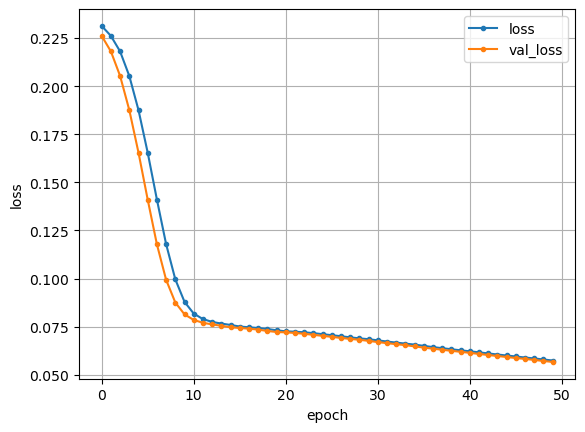

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

loss     = history.history['loss']
val_loss = history.history['val_loss']
# mse = history.history['mean_squared_error']
# val_mse = history.history['val_mean_squared_error']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
# plt.plot(range(nb_epoch), mse,     marker='.', label='mse')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
# plt.plot(range(nb_epoch), val_mse, marker='.', label='val_mse')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(X_train, autoencoder.predict(X_train))
mse



1500/1500 [==============================] - 3s 2ms/step


0.056940712

375/375 [==============================] - 0s 1ms/step
Reconstruction error threshold (train):  0.19281483
Reconstruction error threshold (valid):  0.24185827


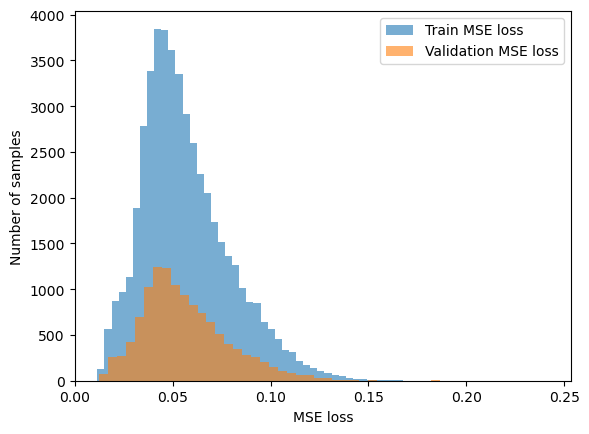

In [19]:
import matplotlib.pyplot as plt


# Get train MSE loss.
X_train_pred = autoencoder.predict(X_train)
train_mse_loss = np.mean(np.square(X_train_pred - X_train), axis=1)

# Get valid MSE loss.
valid_predictions = autoencoder.predict(X_valid)
valid_mse_loss = np.mean(np.square(valid_predictions - X_valid), axis=1)

# Get reconstruction loss threshold.
threshold_train = np.max(train_mse_loss)
threshold_valid = np.max(valid_mse_loss)
print("Reconstruction error threshold (train): ", threshold_train)
print("Reconstruction error threshold (valid): ", threshold_valid)

# Plot histograms.
plt.hist(train_mse_loss, bins=50, alpha=0.6, label='Train MSE loss')
plt.hist(valid_mse_loss, bins=50, alpha=0.6, label='Validation MSE loss')
plt.xlabel("MSE loss")
plt.ylabel("Number of samples")
plt.legend()
plt.show()


In [20]:
valid_predictions

array([[6.96143445e-08, 1.08407257e-07, 5.43091062e-07, ...,
        1.29408889e-07, 1.75744148e-07, 5.60026692e-08],
       [9.57992626e-12, 1.09365928e-11, 5.77531134e-10, ...,
        6.94609092e-11, 7.19368662e-11, 3.62774949e-11],
       [2.11331994e-12, 5.14322179e-12, 1.30520733e-10, ...,
        9.51576838e-12, 8.55714735e-11, 1.06068435e-11],
       ...,
       [8.56233413e-08, 1.23911747e-07, 4.46522506e-07, ...,
        8.19480164e-08, 2.16924022e-07, 6.87466368e-08],
       [6.52243415e-08, 8.38005292e-08, 5.19748539e-07, ...,
        1.59386346e-07, 1.68875516e-07, 4.90401959e-08],
       [2.56216177e-11, 3.54526061e-11, 2.60830202e-09, ...,
        4.39152187e-10, 5.23463384e-10, 1.80323992e-10]], dtype=float32)

# Model saving

In [15]:
autoencoder.save('./Model')

INFO:tensorflow:Assets written to: ./Model\assets
